# Quantum computing with neutral atoms: assignement

## Introduction
A telecommunication company contacts you with the following situation. They have a certain number of
antennas distributed over a geographical area, and each antenna uses a certain radio frequency to communi-
cate. If two antennas are geographically close to each other, then they will interfere with each other if they
use the same frequency (see Fig. 1). On the other hand, it’s not possible to just assign a different frequency
to each antenna, because the number of available frequencies is limited. Therefore, the client wants to assign
a minimum number of different frequencies to their antennas, while minimizing interferences at the same
time.

![image.png](exemple.png)

Figure 1: Schematic example of interference between antennas. (a) Bad frequency assignment. Two antennas
are assigned the same frequency (represented by the color green) and they lie within the interference radius
of each other (represented as a dashed circle around them). (b) The same antennas are assigned different
frequencies (green and orange), so they will not interfere with each other even if they lie within the respective
interference radius. (c) Two antennas can be assigned the same frequency (green) if they don’t lie within
each other’s interference radius.

## 2 Materials
The client has 8 antennas. The physical (x, y) coordinates of the antennas are as follows:
- antenna 1 (0, 0)
- antenna 2 (3, 5.2)
- antenna 3 (6, 0)
- antenna 4 (9, -5.2)
- antenna 5 (9, 0)
- antenna 6 (9, 5.2)
- antenna 7 (9, 10.4)
- antenna 8 (12, 0)

The numbers are expressed in kilometers. Two antennas will interfere with each other if they are less
than 8.7 km apart.

## 3 Assignment

### Step 1

Model the problem of antenna frequency assignment as a graph coloring problem on unit-disk graphs (see
16/10 lecture)

In [1]:
from antenna_graph import AntennaGraph

In [2]:
import math


def calculate_adjacency_list(antenna_coordinates, interference_radius):
    """
    Calculate the adjacency list based on antenna coordinates and interference radius.

    Parameters:
    - antenna_coordinates (list): List of antenna coordinates (x, y).
    - interference_radius (float): The interference radius for unit-disk graphs.

    Returns:
    - list: Adjacency list representing connections between antennas.
    - int: Number of antennas in the graph.
    """
    adjacency_list = []
    num_antennas = len(antenna_coordinates)

    for i in range(num_antennas):
        for j in range(num_antennas):
            if j <= i:
                continue

            if calculate_distance(antenna_coordinates[j], antenna_coordinates[i]) <= interference_radius:
                adjacency_list.append((i + 1, j + 1))

    return adjacency_list, num_antennas

def calculate_distance(coord1, coord2):
    """
    Calculate Euclidean distance between two coordinates.

    Parameters:
    - coord1 (tuple): First coordinate (x, y).
    - coord2 (tuple): Second coordinate (x, y).

    Returns:
    - float: Euclidean distance between the coordinates.
    """
    return math.sqrt((coord2[0] - coord1[0])**2 + (coord2[1] - coord1[1])**2)

def model_antenna_frequency(antenna_coordinates, interference_radius):
    """
    Model antenna frequency assignment problem.

    Parameters:
    - antenna_coordinates (list): List of antenna coordinates (x, y).
    - interference_radius (float): The interference radius for unit-disk graphs.

    Returns:
    - list: Adjacency list representing connections between antennas.
    - int: Number of antennas in the graph.
    """
    adj_list, num_antennas = calculate_adjacency_list(antenna_coordinates, interference_radius)
    return adj_list, num_antennas

def create_antenna_coordinates():
    """
    Create example antenna coordinates.

    Returns:
    - list: List of antenna coordinates (x, y).
    """
    return [
        (0, 0),
        (3, 5.2),
        (6, 0),
        (9, -5.2),
        (9, 0),
        (9, 5.2),
        (9, 10.4),
        (12, 0)
    ]

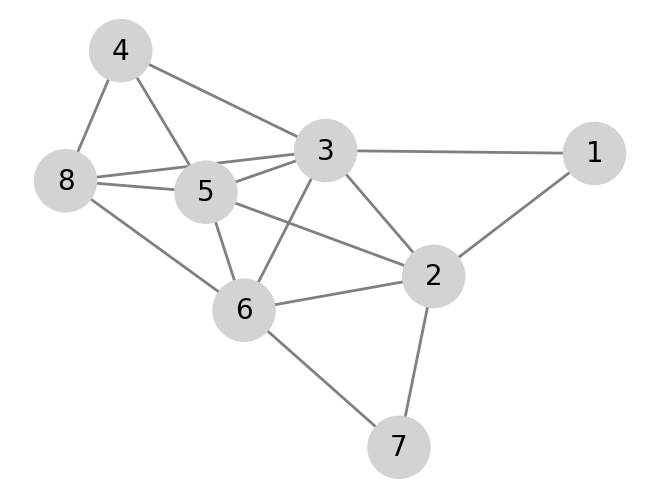

In [3]:
# Example Usage:
antenna_coordinates = create_antenna_coordinates()
interference_radius = 8.7

adj_list, num_antennas = model_antenna_frequency(antenna_coordinates, interference_radius)

# Create an instance of the AntennaGraph class and visualize the graph
graph_model = AntennaGraph(num_antennas)
graph_model.add_connections(adj_list)
graph_model.print_graph()

### Step 2

Design an algorithm to solve graph coloring by using repeated applications of maximum independent set
(MIS) (see 16/10 lecture)

In [4]:
def int_to_binary(n, size=0):
    """
    Convert an integer to binary representation.

    Parameters:
    - n (int): Integer to be converted.
    - size (int, optional): Size of the binary representation.

    Returns:
    - str: Binary representation of the integer.
    """
    binary = bin(n)[2:]
    return binary.rjust(size, '0')

def have_common_bit(bit_string1, bit_string2):
    """
    Check if two binary strings have a common bit set to 1.

    Parameters:
    - bit_string1 (str): Binary string.
    - bit_string2 (str): Binary string.

    Returns:
    - bool: True if there is a common bit set to 1, False otherwise.
    """
    num1 = int(bit_string1, 2)
    num2 = int(bit_string2, 2)
    return (num1 & num2) != 0


In [5]:
def calculate_distance(coord1, coord2):
    """
    Calculate Euclidean distance between two coordinates.

    Parameters:
    - coord1 (tuple): First coordinate (x, y).
    - coord2 (tuple): Second coordinate (x, y).

    Returns:
    - float: Euclidean distance between the coordinates.
    """
    return math.sqrt((coord2[0] - coord1[0])**2 + (coord2[1] - coord1[1])**2)

def cost_function(bit_string, length, adj_list):
    """
    Calculate the cost of a coloring configuration.

    Parameters:
    - bit_string (str): Binary string representing the coloring configuration.
    - length (int): Number of vertices in the graph.
    - adj_list (list): Adjacency list representing connections between vertices.

    Returns:
    - int: Cost of the coloring configuration.
    """
    cost = 0
    for i in range(length):
        cost -= int(bit_string[i])
        for j in range(length):
            if i != j and (i+1, j+1) in adj_list:
                cost += 2 * int(bit_string[i]) * int(bit_string[j])
    return cost

def find_min_cost_coloring(adj_list, actual_vertices, vertices, colored_edges):
    """
    Find the coloring configuration with the minimum cost.

    Parameters:
    - adj_list (list): Adjacency list representing connections between vertices.
    - actual_vertices (int): Number of vertices remaining after previous colorings.
    - vertices (int): Total number of vertices in the graph.
    - colored_edges (str): Binary string representing previously colored edges.

    Returns:
    - str: Binary string representing the coloring configuration with the minimum cost.
    """
    cost_list = [math.inf if have_common_bit(int_to_binary(i, vertices), colored_edges) else cost_function(int_to_binary(i, vertices), vertices, adj_list) for i in range(2**vertices)]
    return int_to_binary(cost_list.index(min(cost_list)), vertices)

def remove_edges(new_adjacent_list, index):
    """
    Remove edges containing a specific vertex index from the adjacency list.

    Parameters:
    - new_adjacent_list (list): Adjacency list.
    - index (int): Vertex index to be removed.

    Returns:
    - list: Updated adjacency list with edges containing the specified index removed.
    """
    return [t for t in new_adjacent_list if index not in t]

def remove_vertices_and_edges(bit_string, vertices, adjacent_list):
    """
    Remove vertices and corresponding edges from the graph based on a coloring configuration.

    Parameters:
    - bit_string (str): Binary string representing the coloring configuration.
    - vertices (int): Number of vertices in the graph.
    - adjacent_list (list): Adjacency list representing connections between vertices.

    Returns:
    - list: Updated adjacency list after removing vertices and edges.
    - int: Updated number of vertices.
    """
    new_adj_list = adjacent_list.copy()
    for i, bit in enumerate(bit_string):
        if bit == '1':
            new_adj_list = remove_edges(new_adj_list, i+1)
            vertices -= 1
    return new_adj_list, vertices

def count_color(color_list, vertices):
    """
    Count the colored edges based on a list of coloring configurations.

    Parameters:
    - color_list (list): List of binary strings representing coloring configurations.
    - vertices (int): Number of vertices in the graph.

    Returns:
    - str: Binary string representing the colored edges.
    """
    colored_edges = '0' * vertices
    for elements in color_list:
        colored_edges = int_to_binary(int(elements, 2) | int(colored_edges, 2), vertices)
    return colored_edges

def graph_coloring_algorithm(adj_list, vertices):
    """
    Perform graph coloring using repeated applications of maximum independent set.

    Parameters:
    - adj_list (list): Adjacency list representing connections between vertices.
    - vertices (int): Total number of vertices in the graph.

    Returns:
    - list: List of binary strings representing coloring configurations.
    """
    actual_vertices = vertices
    color_list = []
    colored_edges = count_color(color_list, vertices)

    while adj_list:
        current_mis_coloring = find_min_cost_coloring(adj_list, actual_vertices, vertices, colored_edges)
        color_list.append(current_mis_coloring)
        adj_list, actual_vertices = remove_vertices_and_edges(current_mis_coloring, actual_vertices, adj_list)
        colored_edges = count_color(color_list, vertices)

    return color_list

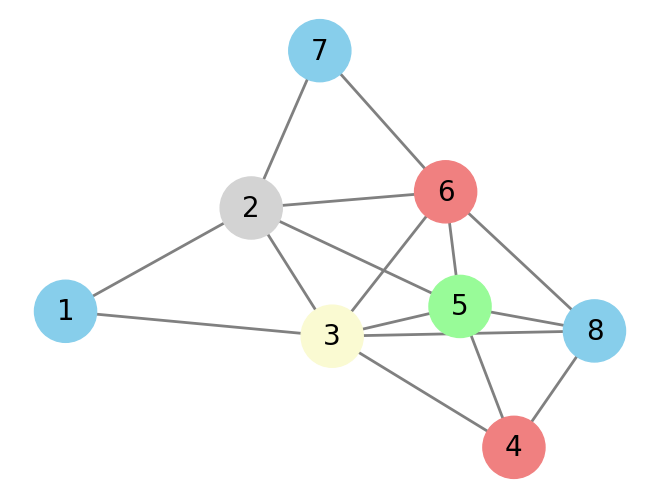

In [ ]:
# Example Usage:
color_list = graph_coloring_algorithm(adj_list, num_antennas)
graph_model.assign_colors(color_list)
graph_model.print_graph()

### Step 3

Implement a MIS solver in Pulser (see 23/10 lecture)

In [7]:
from pulser import Pulse, Sequence, Register
from pulser.devices import MockDevice
from pulser.waveforms import InterpolatedWaveform
from pulser_simulation import QutipBackend


def MIS_pulser(antenna_positions, qubit_separation, active_qubits=None):
    """
    Solve the Maximum Independent Set (MIS) problem using Pulser.

    Parameters:
    - antenna_positions (list): List of antenna positions in 2D space.
    - qubit_separation (float): Separation distance between qubits.
    - active_qubits (list, optional): List of initially active qubits.

    Returns:
    - str: Binary representation of the most probable final state.
    """
    # Initialize active qubits with all qubits if not specified
    active_qubits = active_qubits or range(len(antenna_positions))

    # Define register for active qubits
    qubit_register = Register.from_coordinates([
        antenna_positions[i] for i in active_qubits
    ])

    # Calculate coupling strength
    coupling_strength = MockDevice.rabi_from_blockade(qubit_separation)

    # Set up pulse sequence
    pulse_sequence = Sequence(qubit_register, MockDevice)
    pulse_sequence.declare_channel('ch', 'rydberg_global')

    # Define pulse waveforms
    coupling_wf = InterpolatedWaveform(10000, [0, coupling_strength, 0])
    detuning_wf = InterpolatedWaveform(10000, [-20, 0, 20])

    # Add global pulse to sequence
    pulse_sequence.add(Pulse(coupling_wf, detuning_wf, 0), 'ch')

    # Run simulation with QuTip backend
    simulation_results = QutipBackend(pulse_sequence).run()

    # Get most probable final state
    probs = simulation_results.sample_final_state(1000)
    most_probable_state = max(probs, key=probs.get)
    binary_representation = f"{most_probable_state:0{len(active_qubits)}}"

    mismatched_qubits = []
    full_bitstring = ['0'] * len(antenna_positions)
    for i, bit in enumerate(binary_representation):
        full_bitstring[active_qubits[i]] = bit

    for i in range(len(full_bitstring)):
        if full_bitstring[i] == '1':
            mismatched_qubits.append(i + 1)

    print(f"State probabilities: {probs}")
    print(f"Mismatched qubits: {mismatched_qubits}")

    return "".join(full_bitstring)

def update_active_qubits(binary_representation, current_active_qubits):
    """
    Update the list of active qubits based on the binary representation of the final state.

    Parameters:
    - binary_representation (str): Binary representation of the final state.
    - current_active_qubits (list): List of currently active qubits.

    Returns:
    - list: Updated list of active qubits.
    """
    return [i for i, bit in enumerate(binary_representation) if bit == '0' and i in current_active_qubits]


In [8]:
# Example Usage:
qubit_positions = [
    (0, 0),
    (0, 3),
    (0, 6),
    (0, 9),
    (0, 12)
]

qubit_separation = 3

active_qubits = list(range(len(qubit_positions)))

# First iteration
solution_1 = MIS_pulser(qubit_positions, qubit_separation)
active_qubits = update_active_qubits(solution_1, active_qubits)
print(f"active_qubits: {active_qubits}")

# Second iteration
solution_2 = MIS_pulser(qubit_positions, qubit_separation, active_qubits)
active_qubits = update_active_qubits(solution_2, active_qubits)
print(f"active_qubits: {active_qubits}")

State probsabilities: Counter({'10001': 253, '00000': 174, '01001': 171, '10010': 164, '00100': 74, '10000': 55, '00001': 53, '01010': 32, '10101': 10, '10100': 5, '00101': 4, '00010': 2, '01000': 2, '10011': 1})
Mismatched qubits: [1, 5]
active_qubits: [1, 2, 3]
State probsabilities: Counter({'010': 351, '001': 278, '100': 253, '101': 100, '000': 18})
Mismatched qubits: [3]
active_qubits: [1, 3]


### Step 4

Implement your graph coloring algorithm in Pulser using the MIS solver of step 3

In [9]:
def quantum_coloring(qubit_positions, qubit_spacing):
    """
    Implement a graph coloring algorithm in Pulser using the MIS solver.

    Parameters:
    - qubit_positions (list): List of qubit positions in 2D space.
    - qubit_spacing (float): Separation distance between qubits.

    Returns:
    - list: List of binary strings representing color assignments for each iteration.
    """
    active_qubits = list(range(len(qubit_positions)))
    color_assignments = []

    while active_qubits:
        # Solve MIS problem to get an uncolored bitstring
        uncolored_bitstring = MIS_pulser(qubit_positions, qubit_spacing, active_qubits)
        
        # Append the uncolored bitstring to the list of color assignments
        color_assignments.append(uncolored_bitstring)
        
        # Update the list of active qubits for the next iteration
        active_qubits = update_active_qubits(uncolored_bitstring, active_qubits)

    return color_assignments

State probsabilities: Counter({'10010010': 666, '10000011': 333, '10000100': 1})
Mismatched qubits: [1, 4, 7]
State probsabilities: Counter({'10001': 1000})
Mismatched qubits: [2, 8]
State probsabilities: Counter({'001': 403, '100': 314, '010': 283})
Mismatched qubits: [6]
State probsabilities: Counter({'10': 503, '01': 497})
Mismatched qubits: [3]
State probsabilities: Counter({'1': 1000})
Mismatched qubits: [5]


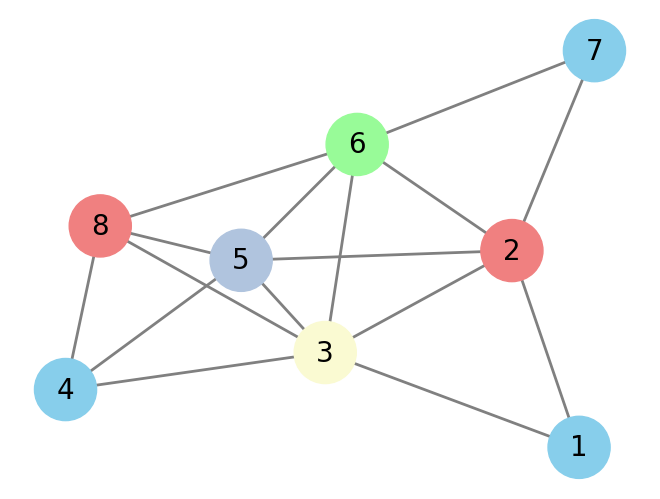

In [10]:
# Using the coordinates of the antenna from step 1

antenna_coordinates = create_antenna_coordinates()
interference_radius = 8.7

adj_list, num_antennas = model_antenna_frequency(antenna_coordinates, interference_radius)

# Create an instance of the AntennaGraph class and visualize the graph
graph_pulser = AntennaGraph(num_antennas)
graph_pulser.add_connections(adj_list)

color_list = quantum_coloring(antenna_coordinates, interference_radius)
graph_pulser.assign_colors(color_list)

graph_pulser.print_graph()
